In [641]:
import pandas as pd 

In [642]:
df_anim = pd.read_csv("FAOSTAT_data_en_3-13-2023_animal.csv") 
df_veg = pd.read_csv("FAOSTAT_data_en_3-13-2023_vegetal.csv") 
df_pop = pd.read_csv("FAOSTAT_data_en_3-13-2023_population.csv") 


In [643]:
df_anim.columns

Index(['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code',
       'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

In [644]:
nouveaux_noms_colonnes = {nom_colonne: nom_colonne.replace(' ', '_') for nom_colonne in df_anim.columns}
df_anim = df_anim.rename(columns=nouveaux_noms_colonnes)
df_anim.columns

Index(['Domain_Code', 'Domain', 'Area_Code_(M49)', 'Area', 'Element_Code',
       'Element', 'Item_Code_(CPC)', 'Item', 'Year_Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag_Description'],
      dtype='object')

# Nettoyage et préparation des données

### 1 : Nettoyer les titres de colonnes

In [645]:
# Mettre les noms de colonnes en minuscules et remplacer les espaces par des underscores
df_anim = df_anim.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
df_veg = df_veg.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
df_pop = df_pop.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))

print(df_anim.columns)
print(df_veg.columns)
print(df_pop.columns)

Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description'],
      dtype='object')
Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description'],
      dtype='object')
Index(['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code',
       'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit',
       'value', 'flag', 'flag_description'],
      dtype='object')


### 2 : Quelle sont les dimensions des jeux de données ?

In [646]:
print(df_anim.shape)
print(df_veg.shape)
print(df_pop.shape)

(31542, 14)
(93458, 14)
(366, 14)


### 3 :  A quoi ressemblent les 5 premières lignes de mes jeux de données ?

In [647]:
pd.set_option('display.max_columns', None)
df_anim.head()
df_anim.sort_values(by='area', ascending=False).head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
31541,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),S2775,Aquatic Plants,2019,2019,g/capita/day,0.00,E,Estimated value
31453,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),S2782,"Fish, Liver Oil",2019,2019,g/capita/day,0.00,E,Estimated value
31429,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),S2743,Cream,2019,2019,g/capita/day,0.03,E,Estimated value
31428,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),S2743,Cream,2018,2018,g/capita/day,0.03,E,Estimated value
31427,FBS,Food Balances (2010-),716,Zimbabwe,674,Protein supply quantity (g/capita/day),S2743,Cream,2019,2019,g/capita/day,0.00,E,Estimated value


In [648]:
pd.set_option('display.max_columns', None)
df_veg.head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2018,2018,kg,160.12,E,Estimated value
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2511,Wheat and products,2019,2019,kg,158.95,E,Estimated value
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2018,2018,kcal/capita/day,1372.02,E,Estimated value
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2511,Wheat and products,2019,2019,kcal/capita/day,1361.66,E,Estimated value
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2511,Wheat and products,2018,2018,g/capita/day,37.00,E,Estimated value


In [649]:
pd.set_option('display.max_columns', None)
df_pop.head()
df_pop.sort_values(by='area', ascending=False).head(5)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
365,FBS,Food Balances (2010-),716,Zimbabwe,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,14645.47,X,Figure from international organizations
364,FBS,Food Balances (2010-),716,Zimbabwe,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,14438.80,X,Figure from international organizations
363,FBS,Food Balances (2010-),894,Zambia,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,17861.03,X,Figure from international organizations
362,FBS,Food Balances (2010-),894,Zambia,511,Total Population - Both sexes,S2501,Population,2018,2018,1000 persons,17352.00,X,Figure from international organizations
361,FBS,Food Balances (2010-),887,Yemen,511,Total Population - Both sexes,S2501,Population,2019,2019,1000 persons,29161.92,X,Figure from international organizations


### 4 : Pour les datasets df_anim et df_veg, ajoutez une colonne ‘type’

In [650]:
df_anim['type'] = 'animal'
df_veg['type'] = 'vegetal'



### 4 .1 :   regroupez les deux jeux de données en 1 et appelez ce DataFrame product

In [651]:
df_product = pd.concat([df_anim, df_veg], ignore_index=True)
df_product

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal
1,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2019,2019,kg,2.73,E,Estimated value,animal
2,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2018,2018,kcal/capita/day,15.42,E,Estimated value,animal
3,FBS,Food Balances (2010-),4,Afghanistan,664,Food supply (kcal/capita/day),S2731,Bovine Meat,2019,2019,kcal/capita/day,16.03,E,Estimated value,animal
4,FBS,Food Balances (2010-),4,Afghanistan,674,Protein supply quantity (g/capita/day),S2731,Bovine Meat,2018,2018,g/capita/day,1.09,E,Estimated value,animal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124995,FBS,Food Balances (2010-),716,Zimbabwe,664,Food supply (kcal/capita/day),S2899,Miscellaneous,2019,2019,kcal/capita/day,2.94,E,Estimated value,vegetal
124996,FBS,Food Balances (2010-),716,Zimbabwe,674,Protein supply quantity (g/capita/day),S2899,Miscellaneous,2018,2018,g/capita/day,0.04,E,Estimated value,vegetal
124997,FBS,Food Balances (2010-),716,Zimbabwe,674,Protein supply quantity (g/capita/day),S2899,Miscellaneous,2019,2019,g/capita/day,0.09,E,Estimated value,vegetal
124998,FBS,Food Balances (2010-),716,Zimbabwe,684,Fat supply quantity (g/capita/day),S2899,Miscellaneous,2018,2018,g/capita/day,0.01,E,Estimated value,vegetal


### 5: Transformez df_pop afin de ne garder que le code du pays, le pays, l’année et la population. Renommer la colonne ‘value’ en ‘pop_1000_hab’.



In [652]:
df_pop = df_pop[['area_code_(m49)', 'area', 'year', 'value']]

df_pop = df_pop.rename(columns={'value': 'pop_1000_hab'})


In [653]:
df_pop.head(1)

,area_code_(m49),area,year,pop_1000_hab
0,4,Afghanistan,2018,37172.0


### 6: Transformez products afin de ne garder que les colonnes area_code_(fao), area, element, item, year, type, unit, value.

In [654]:
df_product.head(1)

,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description,type
0,FBS,Food Balances (2010-),4,Afghanistan,645,Food supply quantity (kg/capita/yr),S2731,Bovine Meat,2018,2018,kg,2.62,E,Estimated value,animal


In [655]:
df_product = df_product[["area_code_(m49)", "area", "element", "item", "year", "type", "unit", "value"]]
df_product

,area_code_(m49),area,element,item,year,type,unit,value
0,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2018,animal,kg,2.62
1,4,Afghanistan,Food supply quantity (kg/capita/yr),Bovine Meat,2019,animal,kg,2.73
2,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2018,animal,kcal/capita/day,15.42
3,4,Afghanistan,Food supply (kcal/capita/day),Bovine Meat,2019,animal,kcal/capita/day,16.03
4,4,Afghanistan,Protein supply quantity (g/capita/day),Bovine Meat,2018,animal,g/capita/day,1.09
...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,Food supply (kcal/capita/day),Miscellaneous,2019,vegetal,kcal/capita/day,2.94
124996,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/capita/day,0.04
124997,716,Zimbabwe,Protein supply quantity (g/capita/day),Miscellaneous,2019,vegetal,g/capita/day,0.09
124998,716,Zimbabwe,Fat supply quantity (g/capita/day),Miscellaneous,2018,vegetal,g/capita/day,0.01


### 7: Fusionnez df_pop avec products et nommez ce DataFrame df

In [656]:
df = pd.merge(df_pop, df_product, on=['area', 'year', "area_code_(m49)"], how='left')
df


,area_code_(m49),area,year,pop_1000_hab,element,item,type,unit,value
0,4,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Bovine Meat,animal,kg,2.62
1,4,Afghanistan,2018,37172.00,Food supply (kcal/capita/day),Bovine Meat,animal,kcal/capita/day,15.42
2,4,Afghanistan,2018,37172.00,Protein supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.09
3,4,Afghanistan,2018,37172.00,Fat supply quantity (g/capita/day),Bovine Meat,animal,g/capita/day,1.20
4,4,Afghanistan,2018,37172.00,Food supply quantity (kg/capita/yr),Mutton & Goat Meat,animal,kg,4.26
...,...,...,...,...,...,...,...,...,...
124995,716,Zimbabwe,2019,14645.47,Fat supply quantity (g/capita/day),Infant food,vegetal,g/capita/day,0.00
124996,716,Zimbabwe,2019,14645.47,Food supply quantity (kg/capita/yr),Miscellaneous,vegetal,kg,2.62
124997,716,Zimbabwe,2019,14645.47,Food supply (kcal/capita/day),Miscellaneous,vegetal,kcal/capita/day,2.94
124998,716,Zimbabwe,2019,14645.47,Protein supply quantity (g/capita/day),Miscellaneous,vegetal,g/capita/day,0.09


### 8 : Quelles sont les types de données de chaque colonne ?

In [657]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 124999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   area_code_(m49)  125000 non-null  int64  
 1   area             125000 non-null  object 
 2   year             125000 non-null  int64  
 3   pop_1000_hab     125000 non-null  float64
 4   element          125000 non-null  object 
 5   item             125000 non-null  object 
 6   type             125000 non-null  object 
 7   unit             125000 non-null  object 
 8   value            125000 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 9.5+ MB


### 9 : Combien y-a t’il de valeurs manquantes par variable ?

In [658]:
df.isnull().sum()	

area_code_(m49)    0
area               0
year               0
pop_1000_hab       0
element            0
item               0
type               0
unit               0
value              0
dtype: int64

### 10 : Est-ce qu’il y a des valeurs aberrantes ? (population négative, etc.) Utilisez un récapitulatif statistique pour répondre à cette question.

In [659]:
df.describe()

,area_code_(m49),year,pop_1000_hab,value
count,125000.000000,125000.000000,1.250000e+05,125000.000000
mean,425.301352,2018.508584,5.143125e+04,11.001024
std,250.726029,0.499928,1.872539e+05,56.218072
min,4.000000,2018.000000,1.076000e+01,-0.030000
25%,204.000000,2018.000000,2.801000e+03,0.000000
50%,418.000000,2019.000000,9.965000e+03,0.190000
75%,642.000000,2019.000000,3.182529e+04,2.800000
max,894.000000,2019.000000,1.465634e+06,1779.760000


11.	Affichez les valeurs uniques de la colonne area

In [660]:
df.area.unique()


array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'China, mainland',
       'China, Taiwan Province of', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Fre

### 13 : Modifiez votre jeu de données afin que les informations soient indexées par area_code, area, year, pop_1000_hab, type et item

In [661]:
# df = df.pivot(index=['area_code_(m49)', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns='element', values='value')

df.head(2)

,area_code_(m49),area,year,pop_1000_hab,element,item,type,unit,value
0,4,Afghanistan,2018,37172.0,Food supply quantity (kg/capita/yr),Bovine Meat,animal,kg,2.62
1,4,Afghanistan,2018,37172.0,Food supply (kcal/capita/day),Bovine Meat,animal,kcal/capita/day,15.42


In [662]:
df = df.pivot(index=['area_code_(m49)', 'area', 'year', 'pop_1000_hab', 'type', 'item'], columns='element', values='value').reset_index()
df.head(2)

element,area_code_(m49),area,year,pop_1000_hab,type,item,Fat supply quantity (g/capita/day),Food supply (kcal/capita/day),Food supply quantity (kg/capita/yr),Protein supply quantity (g/capita/day)
0,4,Afghanistan,2018,37172.0,animal,Bovine Meat,1.2,15.42,2.62,1.09
1,4,Afghanistan,2018,37172.0,animal,"Butter, Ghee",2.5,22.14,1.00,0.03


### 14.	Faire du nettoyage dans le nom des colonnes À ce stade votre jeu de données doit ressembler à cela 


In [663]:
df  = df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))

df

element,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,37172.00,animal,Bovine Meat,1.20,15.42,2.62,1.09
1,4,Afghanistan,2018,37172.00,animal,"Butter, Ghee",2.50,22.14,1.00,0.03
2,4,Afghanistan,2018,37172.00,animal,Cream,0.02,0.23,0.04,0.00
3,4,Afghanistan,2018,37172.00,animal,Demersal Fish,0.00,0.13,0.15,0.03
4,4,Afghanistan,2018,37172.00,animal,Eggs,0.44,6.06,1.55,0.45
...,...,...,...,...,...,...,...,...,...,...
31423,894,Zambia,2019,17861.03,vegetal,Tea (including mate),0.00,0.12,0.11,0.03
31424,894,Zambia,2019,17861.03,vegetal,Tomatoes and products,0.01,0.78,1.40,0.04
31425,894,Zambia,2019,17861.03,vegetal,"Vegetables, other",0.10,12.54,17.94,0.72
31426,894,Zambia,2019,17861.03,vegetal,Wheat and products,0.26,62.61,7.58,1.86


### 15.	Créez des masques afin d’afficher un DataFrame qui ne contient que l’année 2018

In [664]:
mask = df['year'] == 2018

df.loc[mask]


element,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day)
0,4,Afghanistan,2018,37172.0,animal,Bovine Meat,1.20,15.42,2.62,1.09
1,4,Afghanistan,2018,37172.0,animal,"Butter, Ghee",2.50,22.14,1.00,0.03
2,4,Afghanistan,2018,37172.0,animal,Cream,0.02,0.23,0.04,0.00
3,4,Afghanistan,2018,37172.0,animal,Demersal Fish,0.00,0.13,0.15,0.03
4,4,Afghanistan,2018,37172.0,animal,Eggs,0.44,6.06,1.55,0.45
...,...,...,...,...,...,...,...,...,...,...
31334,894,Zambia,2018,17352.0,vegetal,Tea (including mate),0.00,0.13,0.12,0.03
31335,894,Zambia,2018,17352.0,vegetal,Tomatoes and products,0.01,0.78,1.42,0.04
31336,894,Zambia,2018,17352.0,vegetal,"Vegetables, other",0.12,13.90,20.58,0.82
31337,894,Zambia,2018,17352.0,vegetal,Wheat and products,0.24,65.75,8.12,1.98


In [665]:

list_name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 
             'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 
             'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 
             'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']

def myfunc(arg):
    df_name = pd.read_csv(arg+".csv")
    df_name = df_name.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
    df_name["zone"] = arg
    return df_name[["area", "zone"]]



In [666]:
myfunc('middle_africa')

,area,zone
0,Angola,middle_africa
1,Cameroon,middle_africa
2,Central African Republic,middle_africa
3,Chad,middle_africa
4,Congo,middle_africa
5,Democratic Republic of the Congo,middle_africa
6,Gabon,middle_africa
7,Sao Tome and Principe,middle_africa


In [667]:
def concat_with_myfunc(list_name):
    datasets =[]
    for arg in list_name:
        df_zone = myfunc(arg)
        datasets.append(df_zone)

    return pd.concat(datasets)


In [668]:
concat_with_myfunc(list_name)

,area,zone
0,Burundi,eastern_africa
1,Comoros,eastern_africa
2,Djibouti,eastern_africa
3,Ethiopia,eastern_africa
4,Kenya,eastern_africa
...,...,...
3,Solomon Islands,melanesia
4,Vanuatu,melanesia
0,Kiribati,micronesia
0,French Polynesia,polynesia


In [669]:
df = df.merge(concat_with_myfunc(list_name), on=['area'])
df

,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),zone
0,4,Afghanistan,2018,37172.00,animal,Bovine Meat,1.20,15.42,2.62,1.09,southern_asia
1,4,Afghanistan,2018,37172.00,animal,"Butter, Ghee",2.50,22.14,1.00,0.03,southern_asia
2,4,Afghanistan,2018,37172.00,animal,Cream,0.02,0.23,0.04,0.00,southern_asia
3,4,Afghanistan,2018,37172.00,animal,Demersal Fish,0.00,0.13,0.15,0.03,southern_asia
4,4,Afghanistan,2018,37172.00,animal,Eggs,0.44,6.06,1.55,0.45,southern_asia
...,...,...,...,...,...,...,...,...,...,...,...
30758,894,Zambia,2019,17861.03,vegetal,Tea (including mate),0.00,0.12,0.11,0.03,eastern_africa
30759,894,Zambia,2019,17861.03,vegetal,Tomatoes and products,0.01,0.78,1.40,0.04,eastern_africa
30760,894,Zambia,2019,17861.03,vegetal,"Vegetables, other",0.10,12.54,17.94,0.72,eastern_africa
30761,894,Zambia,2019,17861.03,vegetal,Wheat and products,0.26,62.61,7.58,1.86,eastern_africa


In [670]:

# list_name = ['eastern_africa', 'middle_africa', 'northern_africa', 'southern_africa', 'western_africa', 
#              'northern_america', 'central_america', 'caribbean', 'south_america', 'central_asia', 'eastern_asia', 
#              'southern_asia', 'south_eastern_asia', 'western_asia', 'eastern_europe', 'northern_europe', 
#              'southern_europe', 'western_europe', 'australia_new_zealand', 'melanesia', 'micronesia', 'polynesia']

# def myfunc(arg):
#     df_name = pd.read_csv(arg+".csv")
#     df_name = df_name.rename(columns=lambda x: x.strip().lower().replace(' ', '_'))
#     df_name["zone"] = arg
#     return df_name[["area", "zone"]]

# def concat_with_myfunc(list_name):
#     datasets =[]
#     for arg in list_name:
#         df_zone = myfunc(arg)
#         datasets.append(df_zone)

#     return pd.concat(datasets)

# def merge_with_zones(list_name, df):
#     df = df.merge(concat_with_myfunc(list_name), on=['area'])
#     return df

# df

# Étape n°3: Exploration

In [671]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
 


In [672]:
df['fat_supply_quantity_(g/capita/day)'].describe()

count    30543.000000
mean         1.065905
std          3.440813
min          0.000000
25%          0.000000
50%          0.030000
75%          0.360000
max         62.260000
Name: fat_supply_quantity_(g/capita/day), dtype: float64

### l'interpration est que la moyenne et la median sont tres eloigné, le minimun et le Q sont itdentique 

<Axes: xlabel='fat_supply_quantity_(g/capita/day)', ylabel='Count'>

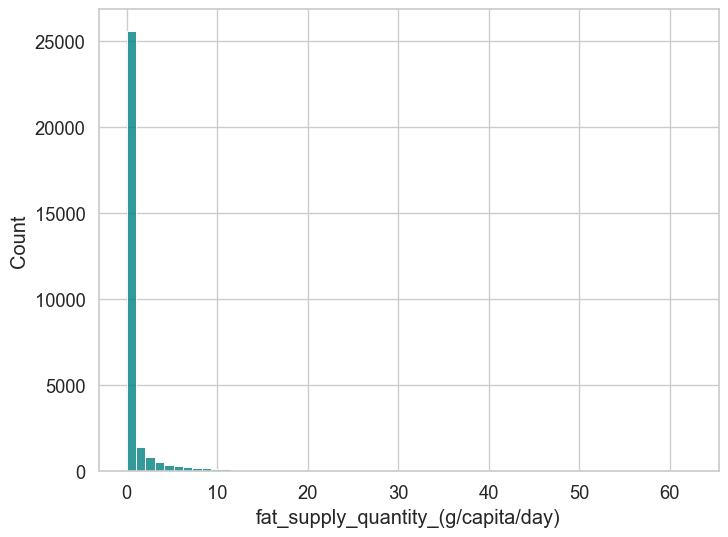

In [673]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df['fat_supply_quantity_(g/capita/day)'], bins=60, kde=False, color='teal', alpha=0.8, edgecolor='white')


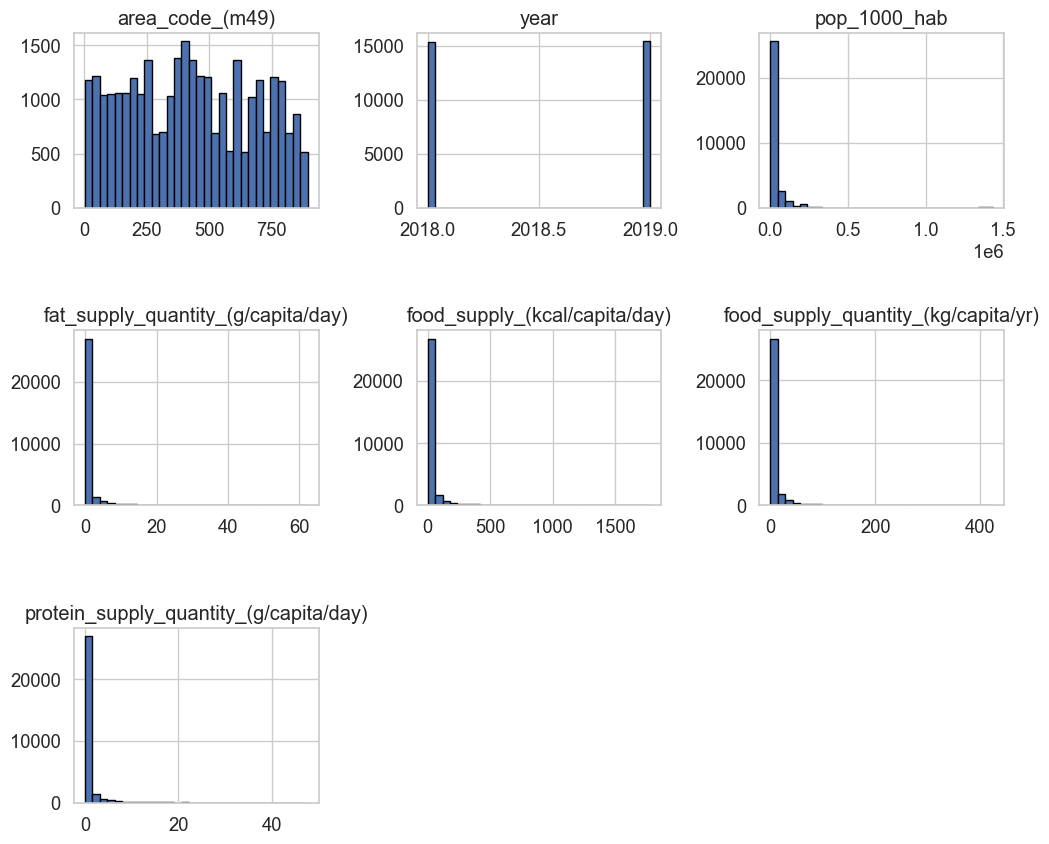

In [674]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

### 3.	Quelle est la population de l’Ukraine en 2018 ? L’output doit être un int (pas un DataFrame)

In [675]:
df[df['area'].str.startswith('Uk')]

,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),zone
28537,804,Ukraine,2018,44246.00,animal,"Aquatic Animals, Others",0.00,0.01,0.01,0.00,eastern_europe
28538,804,Ukraine,2018,44246.00,animal,Aquatic Plants,0.00,0.00,0.00,0.00,eastern_europe
28539,804,Ukraine,2018,44246.00,animal,Bovine Meat,3.61,45.39,7.42,3.01,eastern_europe
28540,804,Ukraine,2018,44246.00,animal,"Butter, Ghee",2.52,22.25,1.13,0.03,eastern_europe
28541,804,Ukraine,2018,44246.00,animal,Cephalopods,0.00,0.13,0.06,0.02,eastern_europe
...,...,...,...,...,...,...,...,...,...,...,...
28694,804,Ukraine,2019,43993.64,vegetal,Tomatoes and products,0.25,21.71,45.76,1.02,eastern_europe
28695,804,Ukraine,2019,43993.64,vegetal,"Vegetables, other",0.51,78.82,106.63,3.35,eastern_europe
28696,804,Ukraine,2019,43993.64,vegetal,Wheat and products,3.11,723.20,93.65,21.59,eastern_europe
28697,804,Ukraine,2019,43993.64,vegetal,Wine,0.00,6.11,3.01,0.00,eastern_europe


In [676]:
ukraine_row = df[(df['area'] == 'Ukraine') & (df['year'] == 2018)]
ukraine_pop_2018 = ukraine_row['pop_1000_hab'].values[0]
int(ukraine_pop_2018 * 1000)


44246000

### 4.	Quels sont les 10 pays les plus peuplés ?

In [677]:
mask = (df['year'] == 2018)
unique_areas = df.loc[mask].drop_duplicates(subset=['area'])
top_10_countries = unique_areas.nlargest(10, 'pop_1000_hab')
top_10_countries['area']



5531              China, mainland
12421                       India
29385    United States of America
12595                   Indonesia
21215                    Pakistan
2916                       Brazil
20858                     Nigeria
1702                   Bangladesh
23089          Russian Federation
13980                       Japan
Name: area, dtype: object

### 5.	Quelle est la population mondiale en 2018 ? En 2019 ? 

In [678]:
mask = (df['year'] == 2018)
unique_areas = df.loc[mask].drop_duplicates(subset=['area'])
total_pop_2018 = int(unique_areas.groupby('area')['pop_1000_hab'].sum().sum()*1000)
print("Population mondiale en 2018 :", "{:,}".format(total_pop_2018))

mask = (df['year'] == 2019)
unique_areas = df.loc[mask].drop_duplicates(subset=['area'])
total_pop_2019 = int(unique_areas.groupby('area')['pop_1000_hab'].sum().sum()*1000)
print("Population mondiale en 2019 :", "{:,}".format(total_pop_2019))



Population mondiale en 2018 : 7,572,928,240
Population mondiale en 2019 : 7,652,388,989


### 6.	Pour quels pays dispose-t-on du moins d’informations (nombre de valeurs manquantes) ? Donnez-en 5

In [679]:
df.isna().sum()

area_code_(m49)                             0
area                                        0
year                                        0
pop_1000_hab                                0
type                                        0
item                                        0
fat_supply_quantity_(g/capita/day)        220
food_supply_(kcal/capita/day)             261
food_supply_quantity_(kg/capita/yr)         7
protein_supply_quantity_(g/capita/day)    218
zone                                        0
dtype: int64

In [680]:
missing_values = df.groupby('area').apply(lambda x: x.isna().sum())
missing_values_sorted = missing_values.sum(axis=1).sort_values(ascending=False)
print("Pays avec le moins d'informations :")
print(missing_values_sorted.head(5))


Pays avec le moins d'informations :
area
Democratic People's Republic of Korea    32
Chad                                     25
Czechia                                  24
Albania                                  24
Haiti                                    24
dtype: int64


### 7.	Créez une nouvelle colonne taux_croissance_pop_18_19 avec le taux de variation de la population entre 2018 et 2019 dans chaque pays. Affichez les 5 pays avec le taux de croissance démographique le plus élevé.

In [681]:
df_2018 = df[df['year'] == 2018][['area', 'pop_1000_hab']]
df_2019 = df[df['year'] == 2019][['area', 'pop_1000_hab']]



In [682]:
pop_2018 = df[df['year'] == 2018].groupby('area')['pop_1000_hab'].sum()
pop_2019 = df[df['year'] == 2019].groupby('area')['pop_1000_hab'].sum()

taux_croissance = ((pop_2019 - pop_2018) / pop_2018) * 100

df['taux_croissance_pop_18_19'] = df['area'].map(taux_croissance)

top_5_pays = df.groupby('area')['taux_croissance_pop_18_19'].max().sort_values(ascending=False).head(5)
print("Les 5 pays avec le taux de croissance démographique le plus élevé :")
print(top_5_pays)


Les 5 pays avec le taux de croissance démographique le plus élevé :
area
Turkmenistan    11.712511
Tajikistan       7.415520
Timor-Leste      7.348497
Luxembourg       7.103676
Ukraine          7.078077
Name: taux_croissance_pop_18_19, dtype: float64


### 8.	Quel est le taux de croissance moyen en fonction de la zone géographique ?

In [683]:
grouped = df.groupby('zone')

moyenne_taux_croissance = grouped['taux_croissance_pop_18_19'].mean()

moyenne_taux_croissance = moyenne_taux_croissance.sort_values(ascending=False)

moyenne_taux_croissance


zone
central_asia             2.898320
eastern_africa           2.796670
middle_africa            2.644065
southern_africa          2.405594
western_africa           2.294768
western_asia             2.191715
caribbean                2.110743
northern_africa          2.102682
melanesia                1.996654
southern_asia            1.771019
central_america          1.525751
western_europe           1.506667
eastern_europe           1.388586
micronesia               1.387931
south_america            1.296984
polynesia                1.134335
australia_new_zealand    1.034118
eastern_asia             0.755162
northern_america         0.755043
northern_europe          0.700754
south_eastern_asia       0.496006
southern_europe          0.427296
Name: taux_croissance_pop_18_19, dtype: float64

### 9.	Calculez la disponibilité de nourriture totale par pays et par année, en kcal et kg de protéines. Attention aux unités de mesure !

In [684]:
# Calculer la disponibilité alimentaire totale par pays et par année, en kcal et kg de protéines
df['dispo_alim_kcal_pays_annee'] = df['food_supply_(kcal/capita/day)'] * df['pop_1000_hab'] * 365 * 1000
df['dispo_prot_pays_annee'] = (df['protein_supply_quantity_(g/capita/day)'] / 1000) * df['pop_1000_hab'] * 365

# Afficher les résultats
print(df[['area', 'year', 'dispo_alim_kcal_pays_annee', 'dispo_prot_pays_annee']])
df




              area  year  dispo_alim_kcal_pays_annee  dispo_prot_pays_annee
0      Afghanistan  2018                2.092152e+11           14788.880200
1      Afghanistan  2018                3.003906e+11             407.033400
2      Afghanistan  2018                3.120589e+09               0.000000
3      Afghanistan  2018                1.763811e+09             407.033400
4      Afghanistan  2018                8.222075e+10            6105.501000
...            ...   ...                         ...                    ...
30758       Zambia  2019                7.823131e+08             195.578278
30759       Zambia  2019                5.085035e+09             260.771038
30760       Zambia  2019                8.175172e+10            4693.878684
30761       Zambia  2019                4.081719e+11           12125.853267
30762       Zambia  2019                1.825397e+09               0.000000

[30763 rows x 4 columns]


,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),zone,taux_croissance_pop_18_19,dispo_alim_kcal_pays_annee,dispo_prot_pays_annee
0,4,Afghanistan,2018,37172.00,animal,Bovine Meat,1.20,15.42,2.62,1.09,southern_asia,-0.187110,2.092152e+11,14788.880200
1,4,Afghanistan,2018,37172.00,animal,"Butter, Ghee",2.50,22.14,1.00,0.03,southern_asia,-0.187110,3.003906e+11,407.033400
2,4,Afghanistan,2018,37172.00,animal,Cream,0.02,0.23,0.04,0.00,southern_asia,-0.187110,3.120589e+09,0.000000
3,4,Afghanistan,2018,37172.00,animal,Demersal Fish,0.00,0.13,0.15,0.03,southern_asia,-0.187110,1.763811e+09,407.033400
4,4,Afghanistan,2018,37172.00,animal,Eggs,0.44,6.06,1.55,0.45,southern_asia,-0.187110,8.222075e+10,6105.501000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,894,Zambia,2019,17861.03,vegetal,Tea (including mate),0.00,0.12,0.11,0.03,eastern_africa,2.933552,7.823131e+08,195.578278
30759,894,Zambia,2019,17861.03,vegetal,Tomatoes and products,0.01,0.78,1.40,0.04,eastern_africa,2.933552,5.085035e+09,260.771038
30760,894,Zambia,2019,17861.03,vegetal,"Vegetables, other",0.10,12.54,17.94,0.72,eastern_africa,2.933552,8.175172e+10,4693.878684
30761,894,Zambia,2019,17861.03,vegetal,Wheat and products,0.26,62.61,7.58,1.86,eastern_africa,2.933552,4.081719e+11,12125.853267


### 10.	Calculez le ratio énergie/poids de chaque produit et pays. Vous devriez vous apercevoir qu’étonnement, ces informations varient en fonction du pays. Pour pallier ce problème, calculez la moyenne de ce ratio pour chaque aliment.  Attention à bien gérer les valeurs égales à 0. Vérifiez la cohérence de votre calcul en comparant le résultat avec l’apport calorique d’un œuf.

In [685]:
# import numpy as np

# # Remplacer les valeurs de nourriture disponibles égales à 0 par NaN
# df.loc[df['food_supply_quantity_(kg/capita/yr)'] == 0, 'food_supply_quantity_(kg/capita/yr)'] = np.nan

# # Calculer le ratio énergie/poids pour chaque produit et pays
# df['energy_per_weight_ratio'] = df['food_supply_(kcal/capita/day)'] * 365 / (df['food_supply_quantity_(kg/capita/yr)'] * 1000)

# # Calculer la moyenne du ratio énergie/poids pour chaque aliment
# mean_ratios = df.groupby('item')['energy_per_weight_ratio'].mean()

# # Comparer avec l'apport calorique d'un œuf
# egg_calories = 78
# print("Apport calorique d'un œuf: {} kcal".format(egg_calories))
# print("Moyenne du ratio énergie/poids pour chaque aliment:\n{}".format(mean_ratios))


In [686]:
# df['energy_per_weight'] = df['food_supply_(kcal/capita/day)'] / (df['food_supply_quantity_(kg/capita/yr)'] * 365)
# df[["area",'energy_per_weight','food_supply_(kcal/capita/day)','food_supply_quantity_(kg/capita/yr)']]

In [697]:
# # Calcul du ratio énergie/poids pour chaque produit et pays
# df["energy_weight_ratio"] = df["food_supply_(kcal/capita/day)"] / (df["food_supply_quantity_(kg/capita/yr)"] * 365)

# # Remplacer les valeurs nulles par NaN
# df["energy_weight_ratio"].replace(0, np.nan, inplace=True)

# # Calcul de la moyenne du ratio pour chaque aliment
# mean_ratios = df.groupby("item")["energy_weight_ratio"].mean().reset_index()

# # Comparaison avec l'apport calorique d'un oeuf
# egg_calories = 72  # calories dans un oeuf de taille moyenne
# mean_ratios["egg_comparison"] = mean_ratios["energy_weight_ratio"] / (egg_calories ) *100

# print(mean_ratios)



                       item  energy_weight_ratio  egg_comparison
0         Alcohol, Non-Food                  NaN             NaN
1       Apples and products                  NaN             NaN
2   Aquatic Animals, Others                  NaN             NaN
3            Aquatic Plants             0.003187        0.004426
4                   Bananas             0.004608        0.006400
..                      ...                  ...             ...
93    Tomatoes and products             0.001983        0.002754
94        Vegetables, other             0.002089        0.002901
95       Wheat and products             0.020115        0.027938
96                     Wine                  NaN             NaN
97                     Yams                  NaN             NaN

[98 rows x 3 columns]


### 11.	À l’instar de la question précédente, calculez le pourcentage de protéine de chaque aliment. Vérifiez votre résultat en le comparant avec l’apport en protéines d’un œuf.

In [700]:

# Calculer le pourcentage de protéine de chaque aliment
df["pourcentage_prot"] = df["protein_supply_quantity_(g/capita/day)"] * 4 / df["food_supply_(kcal/capita/day)"] * 100

# Afficher les 10 premières lignes pour vérifier les résultats
print(df[["item", "pourcentage_prot"]].head(10))

# Comparaison avec l'apport en protéines d'un œuf
apport_proteines_oeuf = 6  # en grammes
apport_calories_oeuf = 72  # en kcal
pourcentage_prot_oeuf = apport_proteines_oeuf * 4 / apport_calories_oeuf * 100

print(f"\nLe pourcentage de protéines dans un œuf est de {pourcentage_prot_oeuf:.2f} %.")



                      item  pourcentage_prot
0              Bovine Meat         28.274968
1             Butter, Ghee          0.542005
2                    Cream          0.000000
3            Demersal Fish         92.307692
4                     Eggs         29.702970
5       Fats, Animals, Raw          0.502513
6          Freshwater Fish         62.745098
7              Meat, Other         50.909091
8  Milk - Excluding Butter         24.589999
9       Mutton & Goat Meat         24.519941

Le pourcentage de protéines dans un œuf est de 33.33 %.


### 12.	Quels sont les 10 aliments les plus caloriques ? Utiliser un diagramme à barres pour visualiser les résultats. À cette étape, vous pouvez vous rendre compte qu’il y a des valeurs aberrantes. Mener votre enquête et corriger le tir.

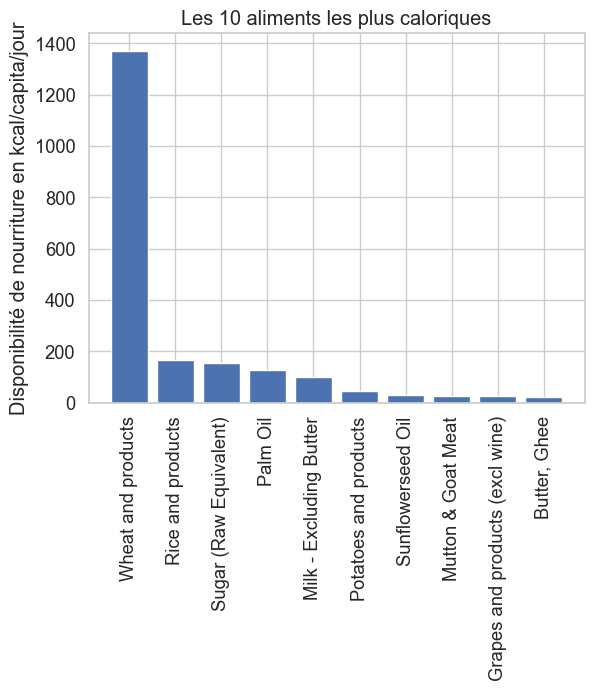

,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),zone,taux_croissance_pop_18_19,dispo_alim_kcal_pays_annee,dispo_prot_pays_annee,energy_weight_ratio
79,4,Afghanistan,2018,37172.0,vegetal,Wheat and products,4.59,1372.02,160.12,37.00,southern_asia,-0.18711,1.861527e+13,502007.8600,0.023476
62,4,Afghanistan,2018,37172.0,vegetal,Rice and products,0.32,166.49,19.78,3.17,southern_asia,-0.18711,2.258900e+12,43009.8626,0.023061
71,4,Afghanistan,2018,37172.0,vegetal,Sugar (Raw Equivalent),0.00,154.71,15.93,0.00,southern_asia,-0.18711,2.099071e+12,0.0000,0.026608
51,4,Afghanistan,2018,37172.0,vegetal,Palm Oil,14.55,128.61,5.31,0.00,southern_asia,-0.18711,1.744952e+12,0.0000,0.066357
8,4,Afghanistan,2018,37172.0,animal,Milk - Excluding Butter,5.03,99.39,37.36,6.11,southern_asia,-0.18711,1.348502e+12,82899.1358,0.007289
58,4,Afghanistan,2018,37172.0,vegetal,Potatoes and products,0.12,46.72,23.28,0.75,southern_asia,-0.18711,6.338867e+11,10175.8350,0.005498
73,4,Afghanistan,2018,37172.0,vegetal,Sunflowerseed Oil,3.31,29.25,1.21,0.00,southern_asia,-0.18711,3.968576e+11,0.0000,0.066229
9,4,Afghanistan,2018,37172.0,animal,Mutton & Goat Meat,2.21,27.08,4.26,1.66,southern_asia,-0.18711,3.674155e+11,22522.5148,0.017416
33,4,Afghanistan,2018,37172.0,vegetal,Grapes and products (excl wine),0.12,26.58,14.47,0.24,southern_asia,-0.18711,3.606316e+11,3256.2672,0.005033
1,4,Afghanistan,2018,37172.0,animal,"Butter, Ghee",2.50,22.14,1.00,0.03,southern_asia,-0.18711,3.003906e+11,407.0334,0.060658


In [688]:

# Supprimer les doublons dans la colonne 'item'
df_drop = df.drop_duplicates(subset=['item'])

# Trier les aliments les plus caloriques
top_calories = df_drop.sort_values(by=['food_supply_(kcal/capita/day)'], ascending=False).head(10)

# Afficher les résultats
top_calories

# créer un diagramme à barres
plt.bar(top_calories['item'], top_calories['food_supply_(kcal/capita/day)'])
plt.xticks(rotation=90)
plt.ylabel('Disponibilité de nourriture en kcal/capita/jour')
plt.title('Les 10 aliments les plus caloriques')
plt.show()

# Afficher les résultats
top_calories

## l'Afghanistan a une erreur dans c'est colonne 
# 	Afghanistan	2018  /	37172.0	vegetal / Wheat and products /  4.59 / 1372.02


In [689]:
df.sort_values(by='food_supply_(kcal/capita/day)', ascending=False)[['area', 'food_supply_(kcal/capita/day)']]


,area,food_supply_(kcal/capita/day)
1772,Bangladesh,1779.76
1862,Bangladesh,1742.94
4273,Cambodia,1601.80
4184,Cambodia,1585.11
27954,Tunisia,1583.43
...,...,...
30148,Venezuela (Bolivarian Republic of),NaN
30218,Venezuela (Bolivarian Republic of),NaN
30237,Venezuela (Bolivarian Republic of),NaN
30476,Yemen,NaN


In [690]:
### la je donne la valeur de la moyenne a tout les 'food_supply_(kcal/capita/day)' qui ont une valeur de  1000,
mean_food_supply = df['food_supply_(kcal/capita/day)'].mean()
df.loc[df['food_supply_(kcal/capita/day)'] > 1000, 'food_supply_(kcal/capita/day)'] = mean_food_supply


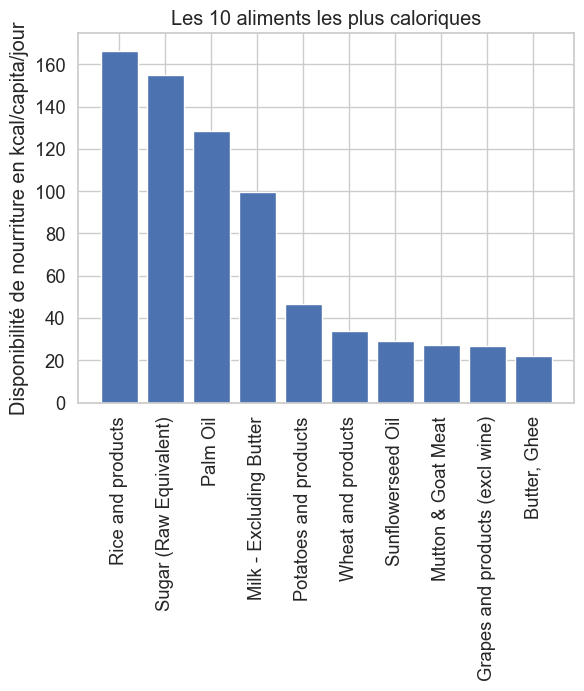

,area_code_(m49),area,year,pop_1000_hab,type,item,fat_supply_quantity_(g/capita/day),food_supply_(kcal/capita/day),food_supply_quantity_(kg/capita/yr),protein_supply_quantity_(g/capita/day),zone,taux_croissance_pop_18_19,dispo_alim_kcal_pays_annee,dispo_prot_pays_annee,energy_weight_ratio
62,4,Afghanistan,2018,37172.0,vegetal,Rice and products,0.32,166.49000,19.78,3.17,southern_asia,-0.18711,2.258900e+12,43009.8626,0.023061
71,4,Afghanistan,2018,37172.0,vegetal,Sugar (Raw Equivalent),0.00,154.71000,15.93,0.00,southern_asia,-0.18711,2.099071e+12,0.0000,0.026608
51,4,Afghanistan,2018,37172.0,vegetal,Palm Oil,14.55,128.61000,5.31,0.00,southern_asia,-0.18711,1.744952e+12,0.0000,0.066357
8,4,Afghanistan,2018,37172.0,animal,Milk - Excluding Butter,5.03,99.39000,37.36,6.11,southern_asia,-0.18711,1.348502e+12,82899.1358,0.007289
58,4,Afghanistan,2018,37172.0,vegetal,Potatoes and products,0.12,46.72000,23.28,0.75,southern_asia,-0.18711,6.338867e+11,10175.8350,0.005498
79,4,Afghanistan,2018,37172.0,vegetal,Wheat and products,4.59,33.97554,160.12,37.00,southern_asia,-0.18711,1.861527e+13,502007.8600,0.023476
73,4,Afghanistan,2018,37172.0,vegetal,Sunflowerseed Oil,3.31,29.25000,1.21,0.00,southern_asia,-0.18711,3.968576e+11,0.0000,0.066229
9,4,Afghanistan,2018,37172.0,animal,Mutton & Goat Meat,2.21,27.08000,4.26,1.66,southern_asia,-0.18711,3.674155e+11,22522.5148,0.017416
33,4,Afghanistan,2018,37172.0,vegetal,Grapes and products (excl wine),0.12,26.58000,14.47,0.24,southern_asia,-0.18711,3.606316e+11,3256.2672,0.005033
1,4,Afghanistan,2018,37172.0,animal,"Butter, Ghee",2.50,22.14000,1.00,0.03,southern_asia,-0.18711,3.003906e+11,407.0334,0.060658


In [691]:
# Supprimer les doublons dans la colonne 'item'
df_drop = df.drop_duplicates(subset=['item'])

# Trier les aliments les plus caloriques
top_calories = df_drop.sort_values(by=['food_supply_(kcal/capita/day)'], ascending=False).head(10)

# Afficher les résultats
top_calories

# créer un diagramme à barres
plt.bar(top_calories['item'], top_calories['food_supply_(kcal/capita/day)'])
plt.xticks(rotation=90)
plt.ylabel('Disponibilité de nourriture en kcal/capita/jour')
plt.title('Les 10 aliments les plus caloriques')
plt.show()

# Afficher les résultats
top_calories


### 13.	Quels sont les 10 aliments les plus riches en protéines ? Utiliser un diagramme à barres pour interpréter les résultats.

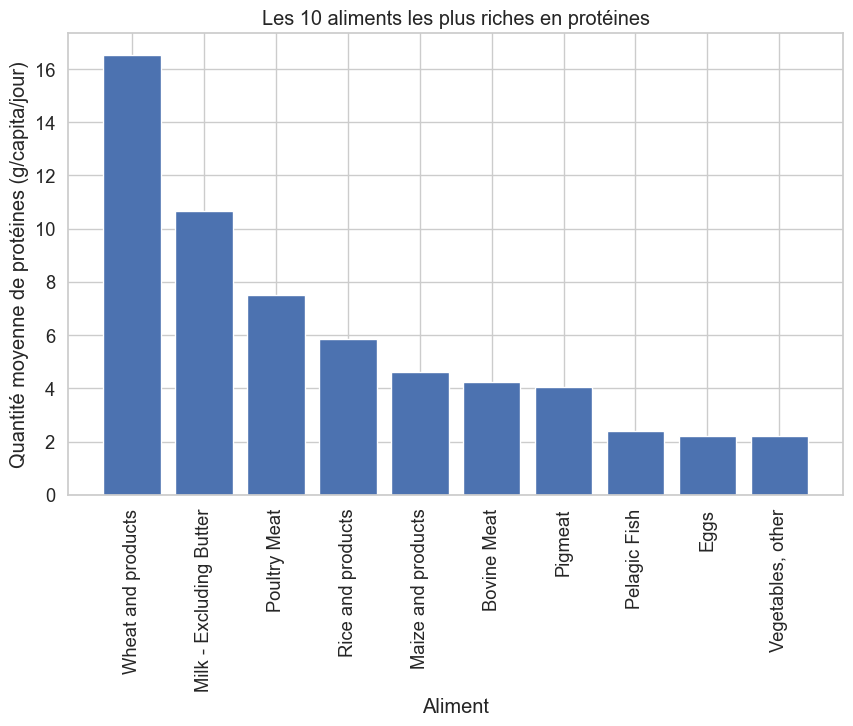

item
Wheat and products         16.536872
Milk - Excluding Butter    10.655726
Poultry Meat                7.515056
Rice and products           5.846313
Maize and products          4.629226
Bovine Meat                 4.226899
Pigmeat                     4.066751
Pelagic Fish                2.396676
Eggs                        2.199860
Vegetables, other           2.190559
Name: protein_supply_quantity_(g/capita/day), dtype: float64

In [692]:

# grouper les données par aliment et calculer la moyenne de la quantité de protéines
grouped = df.groupby('item')
moyenne_prot = grouped['protein_supply_quantity_(g/capita/day)'].mean()

# trier les résultats en ordre décroissant et sélectionner les 10 premiers
top_aliments = moyenne_prot.sort_values(ascending=False).head(10)

# créer un diagramme à barres pour visualiser les résultats
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_aliments.index, top_aliments.values)
ax.set_title('Les 10 aliments les plus riches en protéines')
ax.set_xlabel('Aliment')
ax.set_ylabel('Quantité moyenne de protéines (g/capita/jour)')
plt.xticks(rotation=90)
plt.show()

top_aliments


### 14.	Créez une boîte à moustache de la quantité de nourriture disponible par habitant en kcal par zone géographique. Afin d’optimiser l’affichage modifier les éléments nécessaires si besoin :
○	Mettez un titre
○	La taille du graphique
○	Étiquettes des axes, 
○	Les axes 
○	la couleur en fonction de chaque boite à moustache
Effectuez ce graphique en utilisant la librairie de visualisation seaborn. Interpréter ce graphique.


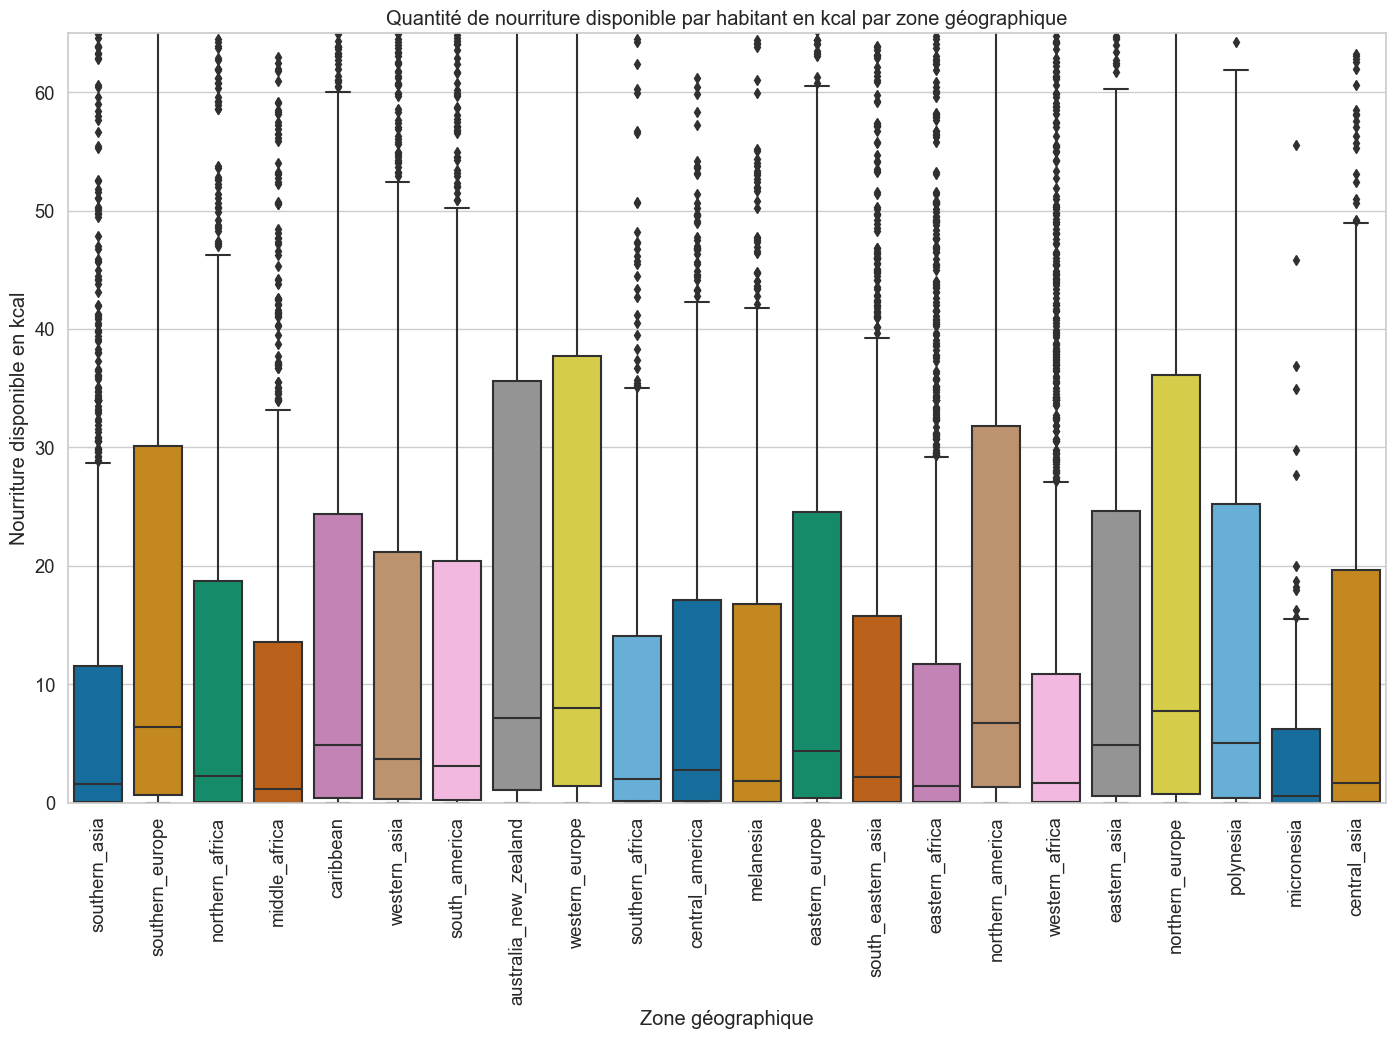

In [693]:
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(17, 10))

sns.boxplot(x="zone", y="food_supply_(kcal/capita/day)" , data=df, palette="colorblind")
ax.set_ylim(0, 65)
plt.title("Quantité de nourriture disponible par habitant en kcal par zone géographique")
plt.xlabel("Zone géographique" )
plt.ylabel("Nourriture disponible en kcal")
plt.xticks(rotation=90)

plt.show()

### 14 version trier part la median

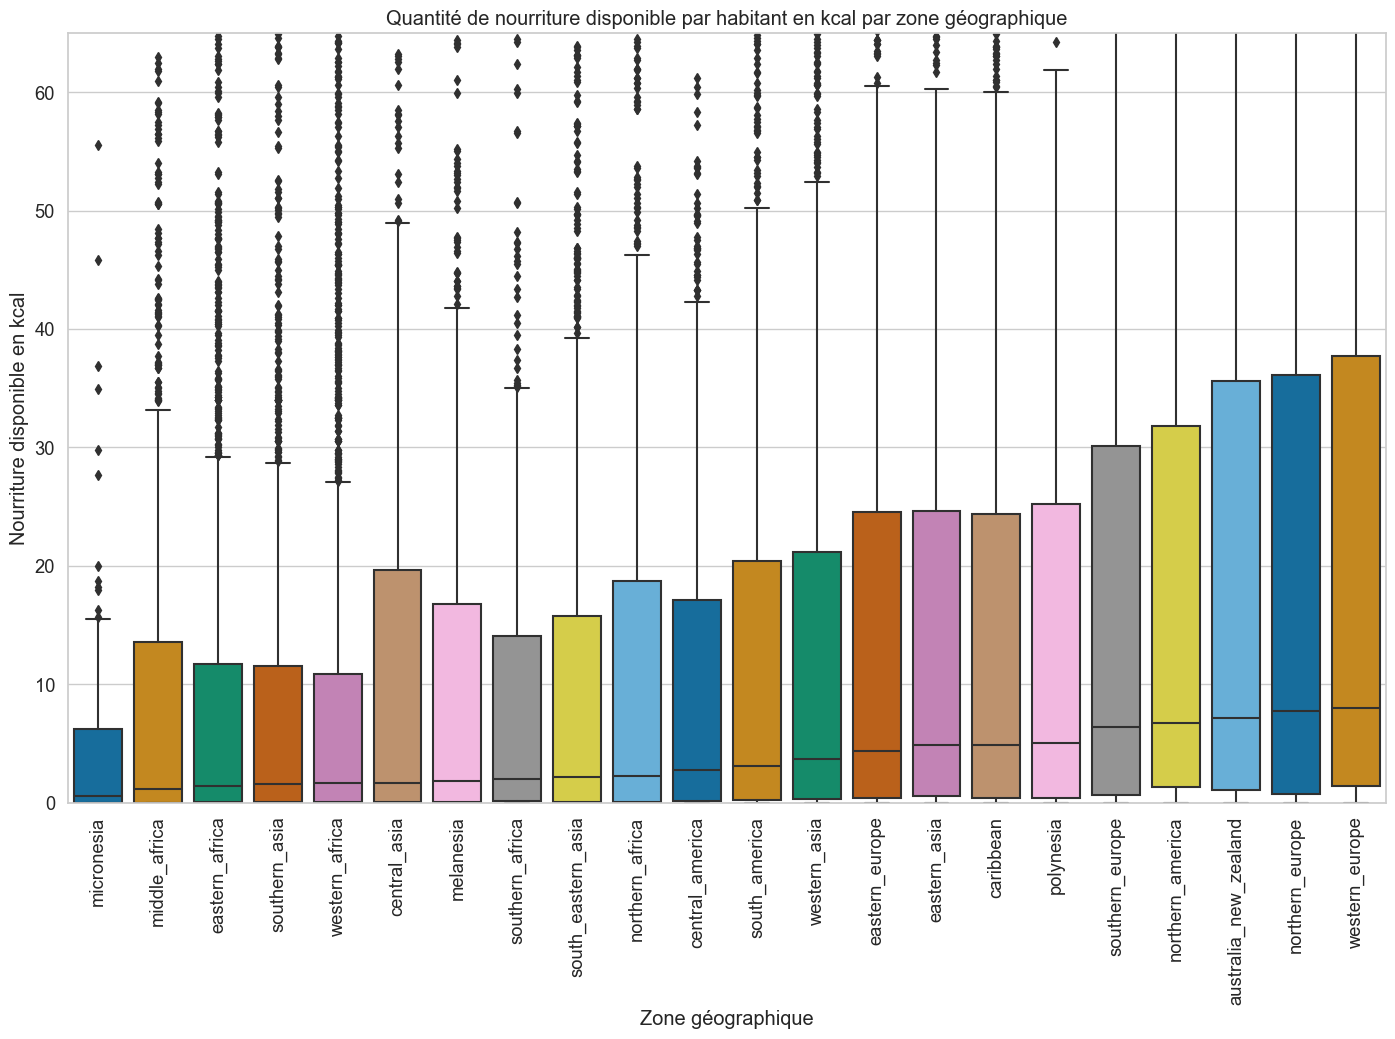

In [694]:
sns.set(style="whitegrid", font_scale=1.2)
fig, ax = plt.subplots(figsize=(17, 10))

sns.boxplot(x="zone", y="food_supply_(kcal/capita/day)", data=df, palette="colorblind", order=df.groupby("zone")["food_supply_(kcal/capita/day)"].median().sort_values().index)
ax.set_ylim(0, 65)
plt.title("Quantité de nourriture disponible par habitant en kcal par zone géographique")
plt.xlabel("Zone géographique" )
plt.ylabel("Nourriture disponible en kcal")
plt.xticks(rotation=90)

plt.show()

### 15.	Avec la disponibilité alimentaire combien d’être humains pourrait-on nourrir ? et avec la disponnibilité alimentaire en végétaux ? Pour répondre à cette question vous avez besoin d’estimer les besoins alimentaires moyens d’une personne, effectuer une recherche pour trouver cette information. Interpréter vos résultats. Exprimer vos résultats sous la forme de % de la population mondiale.

In [695]:

total_food_supply_kcal = df.loc[df['year'] == 2019, 'food_supply_(kcal/capita/day)'].sum() * 365 * 1000000  # 1000000 = en tonne
total_food_supply_prot = df.loc[df['year'] == 2019, 'protein_supply_quantity_(g/capita/day)'].sum() * 365 * 1000000


num_people_kcal = total_food_supply_kcal / (2000 * 365)
num_people_prot = total_food_supply_prot / (50 * 365)


world_population = 7652388989
perc_people_kcal = num_people_kcal / world_population * 100
perc_people_prot = num_people_prot / world_population * 100

print("Nombre de personnes que l'on pourrait nourrir en termes de calories : {:.2f}% de la population mondiale".format(perc_people_kcal))
print("Nombre de personnes que l'on pourrait nourrir en termes de protéines : {:.2f}% de la population mondiale".format(perc_people_prot))




Nombre de personnes que l'on pourrait nourrir en termes de calories : 3.12% de la population mondiale
Nombre de personnes que l'on pourrait nourrir en termes de protéines : 3.85% de la population mondiale
